In [11]:
%load_ext autoreload
%autoreload 2

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

estimators = [
    ("gbr", XGBRegressor(**{'max_depth': 10, 'learning_rate': 0.07547737476917998, 'n_estimators': 511, 'min_child_weight': 8, 'gamma': 0.5040721967680127, 'subsample': 0.8037499605646387, 'colsample_bytree': 0.7390517324360482, 'reg_alpha': 0.07237873956441068, 'reg_lambda': 0.3158987021349957, 'random_state': 174})),
    ("cat", CatBoostRegressor(**{'objective': 'MAE', 'colsample_bylevel': 0.06793414629614411, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'})),
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=10,
    verbose=1,
    passthrough=True,
)

In [22]:
cat_A = CatBoostRegressor(objective="MAE", random_seed=42, boosting_type="Plain", depth=7, l2_leaf_reg=2, iterations=2000)
cat_B = CatBoostRegressor(objective="MAE", random_seed=42, boosting_type="Plain", depth=7, l2_leaf_reg=2, iterations=2000)
cat_C = CatBoostRegressor(objective="MAE", random_seed=42, boosting_type="Plain", depth=7, l2_leaf_reg=2, iterations=2000)

In [44]:
%store -r dm 
dm = dm 

In [45]:
from sklearn.model_selection import train_test_split 
import pandas as pd

X = dm.data.iloc[:, 2:]
y = dm.data.iloc[:, 1]


X_A = dm.data_A.iloc[:, 3:]
y_A = dm.data_A.iloc[:, 1]
X_B = dm.data_B.iloc[:, 3:]
y_B = dm.data_B.iloc[:, 1]
X_C = dm.data_C.iloc[:, 3:]
y_C = dm.data_C.iloc[:, 1]

X_A = dm.add_location(X_A, "A")
X_B = dm.add_location(X_B, "B")
X_C = dm.add_location(X_C, "C")

X_train_A = X_A.iloc[0:int(0.7*X_A.shape[0]):]
y_train_A = y_A.iloc[0:int(0.7*y_A.shape[0]):]
X_test_A = X_A.iloc[-int(0.3*X_A.shape[0]):] 
y_test_A = y_A.iloc[-int(0.3*y_A.shape[0]):]

X_test_A, X_validate_A, y_test_A, y_validate_A = train_test_split(X_test_A, y_test_A, train_size=0.4, shuffle=False)

X_train_B = X_B.iloc[0:int(0.7*X_B.shape[0]):]
y_train_B = y_B.iloc[0:int(0.7*y_B.shape[0]):]
X_test_B = X_B.iloc[-int(0.3*X_B.shape[0]):] 
y_test_B = y_B.iloc[-int(0.3*y_B.shape[0]):] 

X_test_B, X_validate_B, y_test_B, y_validate_B = train_test_split(X_test_B, y_test_B, train_size=0.4, shuffle=False)

X_train_C = X_C.iloc[0:int(0.7*X_C.shape[0]):]
y_train_C = y_C.iloc[0:int(0.7*y_C.shape[0]):]
X_test_C = X_C.iloc[-int(0.3*X_C.shape[0]):] 
y_test_C = y_C.iloc[-int(0.3*y_C.shape[0]):] 

X_test_C, X_validate_C, y_test_C, y_validate_C = train_test_split(X_test_C, y_test_C, train_size=0.4, shuffle=False)

X_train = pd.concat([X_train_A, X_train_B, X_train_C], ignore_index=True)
X_validate = pd.concat([X_validate_A, X_validate_B, X_validate_C], ignore_index=True)
X_test = pd.concat([X_test_A, X_test_B, X_test_C], ignore_index=True)

y_train = pd.concat([y_train_A, y_train_B, y_train_C], ignore_index=True)
y_validate = pd.concat([y_validate_A, y_validate_B, y_validate_C], ignore_index=True)
y_test = pd.concat([y_test_A, y_test_B, y_test_C], ignore_index=True)

X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X.columns)]
X_submission_A = dm.X_test_estimated_a.iloc[:, 1:]
X_submission_B = dm.X_test_estimated_b.iloc[:, 1:]
X_submission_C = dm.X_test_estimated_c.iloc[:, 1:]

X_submission_A


,is_day:idx,is_in_shadow:idx,clear_sky_energy_1h:J,diffuse_rad_1h:J,direct_rad_1h:J,fresh_snow_12h:cm,fresh_snow_24h:cm,precip_5min:mm,rain_water:kgm2,snow_water:kgm2,...,direct_rad:W_lagged_2,diffuse_rad:W_lagged_2,clear_sky_rad:W_lagged_2,total_cloud_cover:p_lagged_-1,effective_cloud_cover:p_lagged_-1,cloud_base_agl:m_lagged_-1,total_cloud_cover:p_lagged_2,effective_cloud_cover:p_lagged_2,cloud_base_agl:m_lagged_2,location
0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,77.474998,77.474998,1075.100098,0.000000,0.000000,0.000000,0
1,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,88.099998,88.099998,1200.400024,0.000000,0.000000,0.000000,0
2,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,68.599998,68.599998,1179.849976,74.949997,74.949997,1061.550049,0
3,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,66.300003,66.300003,920.049988,77.474998,77.474998,1075.100098,0
4,1.0,0.0,59774.500000,56574.300781,19781.400391,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,74.074997,74.074997,1419.300049,88.099998,88.099998,1200.400024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1.0,0.0,616345.375000,206803.796875,55728.199219,0.0,0.0,0.0,0.0,0.0,...,12.975,90.224998,308.325012,75.324997,74.599998,1610.900024,98.949997,98.925003,2749.850098,0
716,1.0,0.0,270762.812500,114295.398438,39743.699219,0.0,0.0,0.0,0.0,0.0,...,14.875,60.150002,185.274994,76.849998,76.125000,1622.800049,93.900002,93.724998,2499.600098,0
717,1.0,1.0,72858.703125,46269.800781,11527.099609,0.0,0.0,0.0,0.0,0.0,...,13.425,33.625000,85.099998,98.324997,98.224998,1767.550049,86.150002,85.574997,2013.750000,0
718,0.0,1.0,1440.199951,9402.900391,0.000000,0.0,0.0,0.0,0.0,0.0,...,3.550,14.325000,24.799999,100.000000,100.000000,1438.449951,75.324997,74.599998,1610.900024,0


In [25]:
reg.fit(X, y)

0:	learn: 315.7221953	total: 19.9ms	remaining: 19.8s
1:	learn: 311.6640532	total: 34.4ms	remaining: 17.2s
2:	learn: 307.5637560	total: 50.5ms	remaining: 16.8s
3:	learn: 299.4572269	total: 63.8ms	remaining: 15.9s
4:	learn: 296.5816705	total: 69.9ms	remaining: 13.9s
5:	learn: 293.0357124	total: 77.3ms	remaining: 12.8s
6:	learn: 287.6665426	total: 84.4ms	remaining: 12s
7:	learn: 284.0734561	total: 102ms	remaining: 12.6s
8:	learn: 276.7980416	total: 118ms	remaining: 13s
9:	learn: 274.2680115	total: 124ms	remaining: 12.3s
10:	learn: 271.1157549	total: 140ms	remaining: 12.6s
11:	learn: 263.9963900	total: 159ms	remaining: 13.1s
12:	learn: 256.9943469	total: 175ms	remaining: 13.3s
13:	learn: 250.3927115	total: 192ms	remaining: 13.5s
14:	learn: 244.9542219	total: 199ms	remaining: 13.1s
15:	learn: 242.3485964	total: 217ms	remaining: 13.3s
16:	learn: 240.3443608	total: 223ms	remaining: 12.9s
17:	learn: 238.0741190	total: 239ms	remaining: 13.1s
18:	learn: 235.8119787	total: 260ms	remaining: 13.4s


StackingRegressor(cv=10,
                  estimators=[('gbr',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7390517324360482,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.5040721967680127,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            intera...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None, min_child_weight=8,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=511, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=174, ...)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x29e451790>)],
                  final_estimator=LinearRegression(), passthrough=True,
                  verbose=1)

In [26]:
cat_A.fit(X_A, y_A)
cat_B.fit(X_B, y_B)
cat_C.fit(X_C, y_C)

0:	learn: 615.9052566	total: 9.86ms	remaining: 19.7s
1:	learn: 603.2017461	total: 17.8ms	remaining: 17.7s
2:	learn: 587.8790072	total: 25.5ms	remaining: 16.9s
3:	learn: 573.7029350	total: 33.3ms	remaining: 16.6s
4:	learn: 559.8235260	total: 40.8ms	remaining: 16.3s
5:	learn: 546.9064930	total: 49.1ms	remaining: 16.3s
6:	learn: 533.7997803	total: 56.7ms	remaining: 16.1s
7:	learn: 522.3555154	total: 64.5ms	remaining: 16.1s
8:	learn: 510.8039881	total: 73.5ms	remaining: 16.3s
9:	learn: 498.7522106	total: 80.7ms	remaining: 16.1s
10:	learn: 487.8962857	total: 88.7ms	remaining: 16s
11:	learn: 476.9288385	total: 96.5ms	remaining: 16s
12:	learn: 466.4406686	total: 104ms	remaining: 15.9s
13:	learn: 456.1348404	total: 111ms	remaining: 15.8s
14:	learn: 446.8138643	total: 118ms	remaining: 15.7s
15:	learn: 437.6856258	total: 126ms	remaining: 15.6s
16:	learn: 428.4566497	total: 133ms	remaining: 15.6s
17:	learn: 419.9868161	total: 140ms	remaining: 15.5s
18:	learn: 411.2980793	total: 148ms	remaining: 1

In [65]:
## Specify the model to be used
import numpy as np
import pandas as pd

reg_pred = pd.DataFrame(reg.predict(X_submission))

## Specify the model to be used
pred_A = pd.DataFrame(cat_A.predict(X_submission_A))
pred_B = pd.DataFrame(cat_B.predict(X_submission_B))
pred_C = pd.DataFrame(cat_C.predict(X_submission_C))
 
df = pd.concat([pred_A, pred_B, pred_C], ignore_index=True)

pred = pd.DataFrame(0.4*np.array(reg_pred) + 0.6*np.array(df))

pred[pred<0] = 0

# # NAME THE FILE 
pred.to_csv("catXstack_1.csv")

pred


,0
0,3.711094
1,1.839277
2,2.006084
3,49.321822
4,338.163267
...,...
2155,47.032885
2156,11.141521
2157,0.000000
2158,0.000000


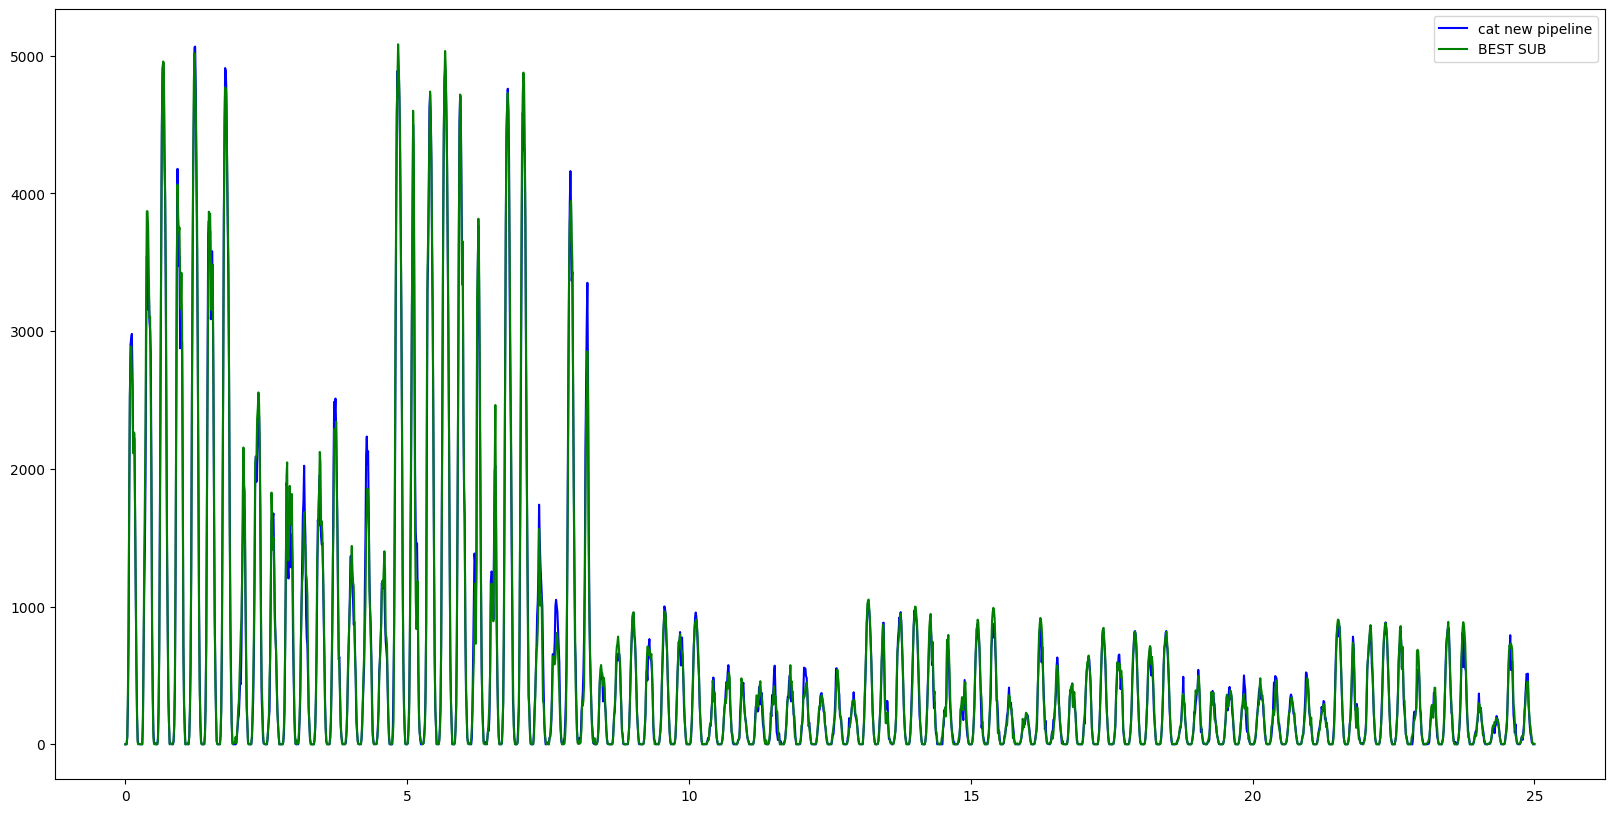

120022.38821142916


In [7]:
import matplotlib.pyplot as plt 
import csv 
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_absolute_error
stack1_pred = pd.read_csv("stack_1.csv")
stack2_pred = pd.read_csv("stack_2.csv")
stack3_pred = pd.read_csv("stack_3.csv")
stack5_pred = pd.read_csv("stack_5.csv")
cat2_pred = pd.read_csv("catboost_2.csv")
cat3_pred = pd.read_csv("catboost_3.csv")
cat4_pred = pd.read_csv("catboost_4.csv")
cat10_pred = pd.read_csv("catboost_10.csv")
cat11_pred = pd.read_csv("catboost_11.csv")
cat12_pred = pd.read_csv("catboost_12.csv")
cat13_pred = pd.read_csv("catboost_13_single.csv")
cat15_pred = pd.read_csv("catboost_15_single.csv")
cat20_pred = pd.read_csv("catboost_20_A_BC.csv")
cat22_pred = pd.read_csv("catboost_22_single.csv")
cat30_pred = pd.read_csv("catboost_30_single.csv")
cat31_pred = pd.read_csv("catboost_31_single.csv")
cat_1_sep = pd.read_csv("catboost_1_seperate.csv")
cat_50_sep = pd.read_csv("catboost_50_sep.csv")
log4_pred = pd.read_csv("log_sub_4.csv")
best_pred = pd.read_csv("catboost_1.csv")

diff = pd.DataFrame(stack2_pred) - pd.DataFrame(best_pred)

x = np.linspace(0, 25, 3*720)
y = [] 
  
with open('catboost_31_single.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',') 

    plots.__next__()
    i = 1
      
    for row in plots: 
        y.append(float(row[1])) 
        # i += 1

        # if ( i == 721): 
        #     break
            
        
# plt.legend()


y2 = []

with open('catboost_1.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',') 

    plots.__next__()
    i = 1
      
    for row in plots: 
        y2.append(float(row[1])) 
        # i += 1

        # if ( i == 721): 
        #     break
            
        
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(x, y, color = 'b', label="cat new pipeline") 

plt.plot(x, y2, color = 'g', label="BEST SUB") 

plt.legend() 
plt.show()



print(abs(np.array(best_pred) - np.array(cat_50_sep)).sum())

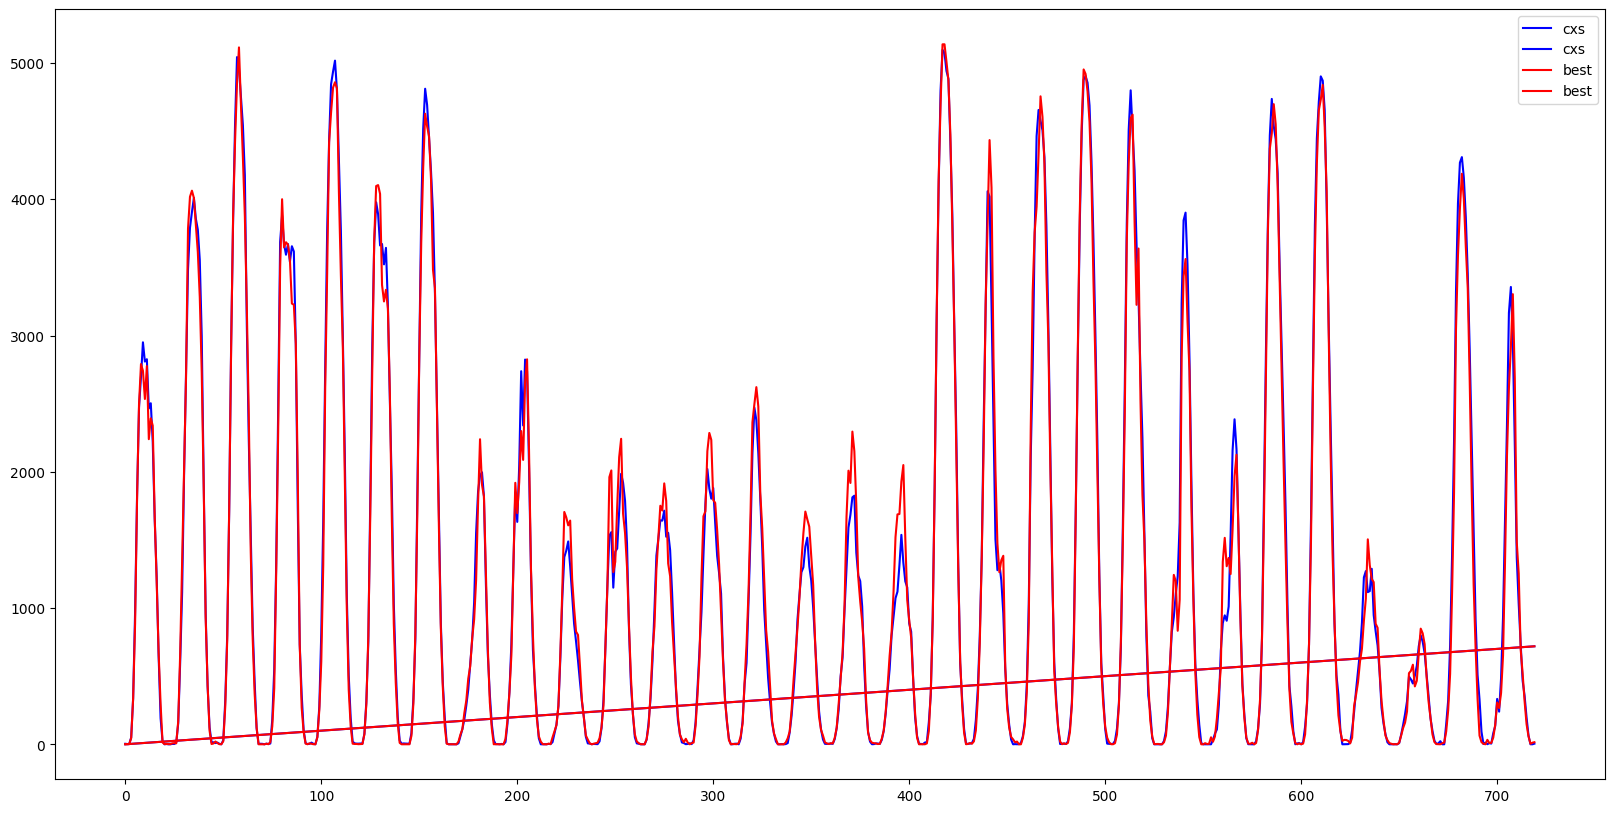

25.00959083628107


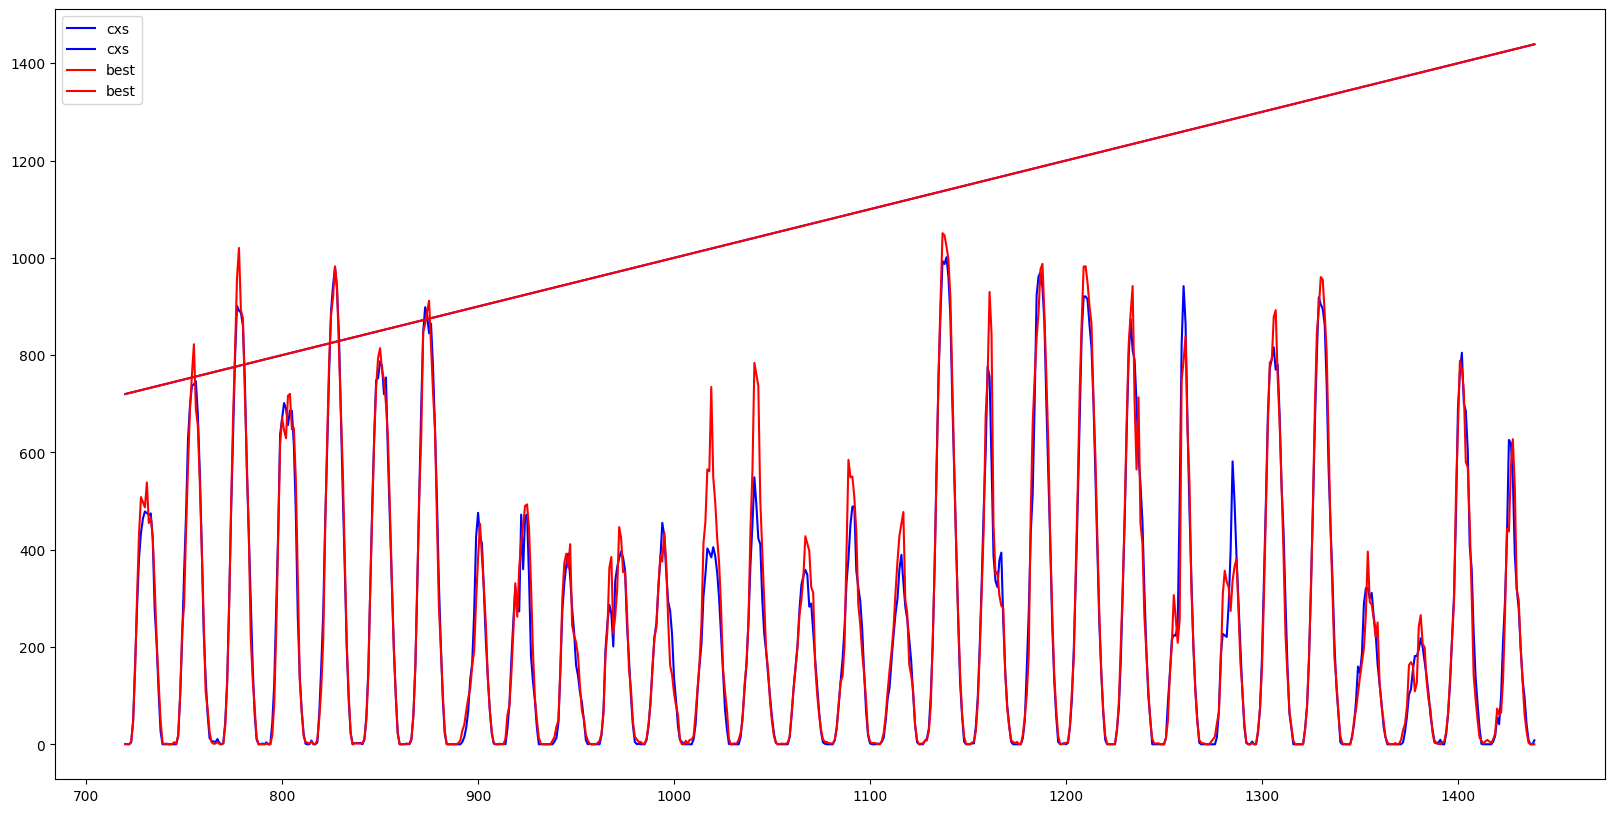

25.00959083628107


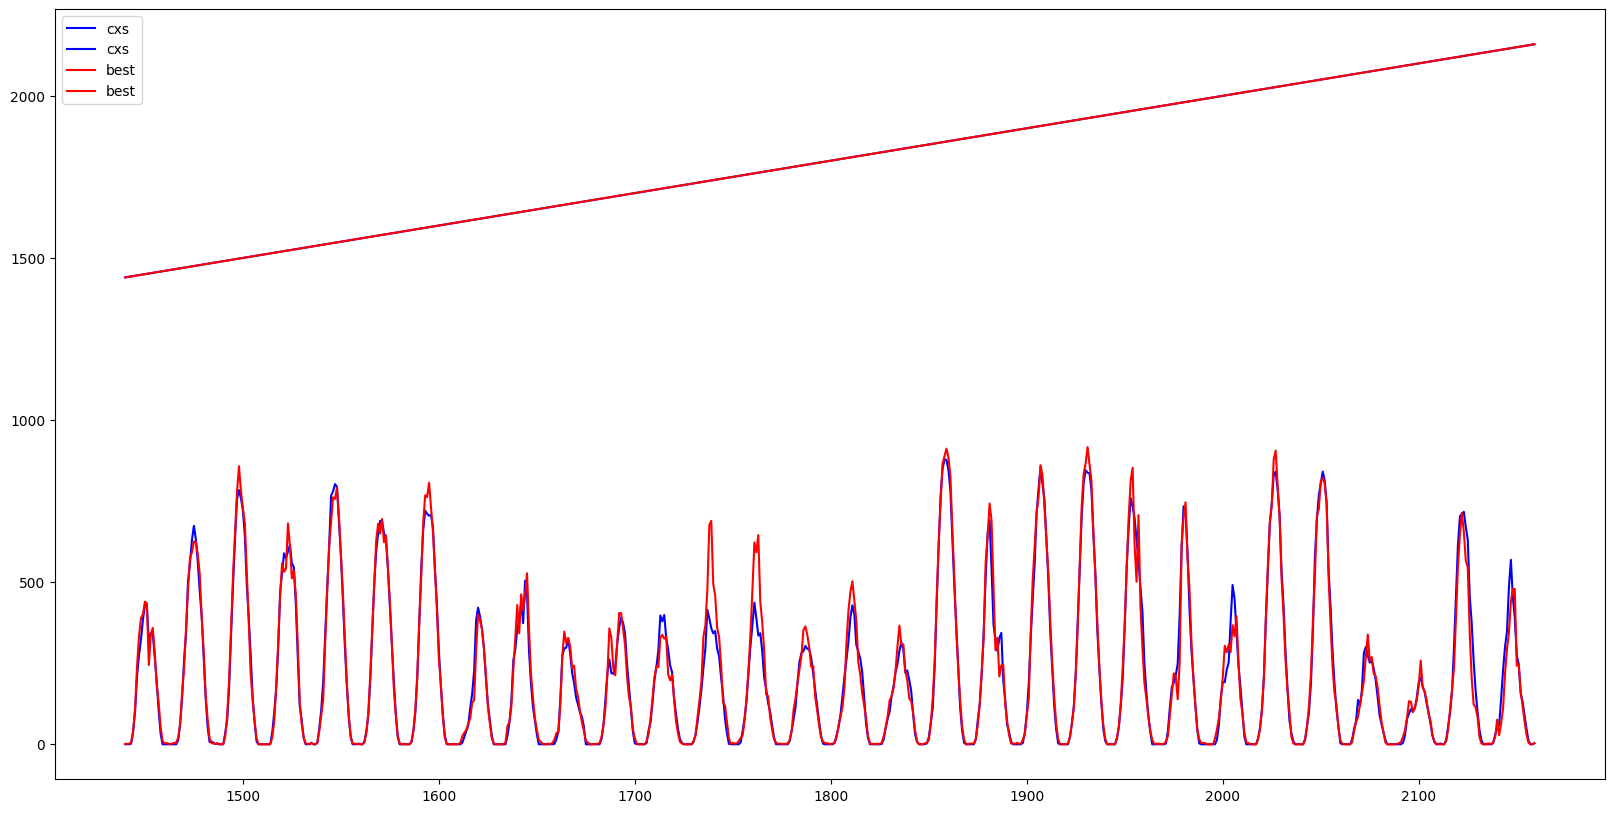

25.00959083628107


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

cxs = pd.read_csv("catXstack_1.csv")

best = pd.read_csv("catxcat.csv")


fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(cxs[0*720:1*720], color = 'b', label="cxs") 
plt.plot(best[0*720:1*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(cxs, best))
fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(cxs[1*720:2*720], color = 'b', label="cxs") 
plt.plot(best[1*720:2*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(cxs, best))

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(cxs[2*720:3*720], color = 'b', label="cxs") 
plt.plot(best[2*720:3*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(cxs, best))

